## APLICAÇÃO DAS TÉCNICAS JUNTO AOS ALGORITMOS BIO-INSPIRADOS E MODELO ESTATÍSTICO

Objetivo: Este código possui a aplicação das técnicas de TensorFlow, SVM e MLP junto ao algoritmos bio-inspirados FA e PSO
Também, é neste código que o modelo estatístico proposto é aplicado.
Base de dados utilizada: Churn in telecom dataset

### Import de bibliotecas

In [1]:
import random
from sklearn.svm import SVC
import bigml.api
import os
import pandas as pd
from bigml.api import BigML
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

### IMPORT  DAS BIBLIOTECAS DO TENSORFLOW - KERAS

In [2]:
#from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
#tensorflow.keras.models
tf.keras.backend.clear_session()  # For easy reset of notebook state.
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### IMPORT DAS BIBLIOTECAS DO SVM

In [3]:
from sklearn.svm import SVC

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Thyago M\\Desktop\\ffmpeg.exe'

### IMPORT DAS BIBLIOTECAS DO MLP

In [5]:
from sklearn import linear_model, model_selection, metrics
from sklearn.neural_network import MLPClassifier

In [6]:
def aplicaMLP(X_train, X_test, y_train):
    #X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=0)
   
    modelMLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    modelMLP.fit(X_train, y_train)
    predictionsMLP = modelMLP.predict_proba(X_test)
    
    return predictionsMLP

### IMPORT DA BASES DE DADOS

In [7]:
api = BigML('ricardomorellosantos','b34ec3c18161b1da38b0c5e04520224f7544405e')
api.download_dataset(dataset='dataset/5e356cd41efc9271bf006ea2', filename=os.getcwd()+'\\bigml.csv')

'C:\\Users\\Thyago M\\Desktop\\APLICAÇÕES TCC - RECENTE\\bigml.csv'

In [8]:
df_bigml = pd.read_csv(os.getcwd()+'\\bigml.csv')

### FUNÇÕES PARA O TRATAMENTO DA BASE DE DADOS

In [9]:
def converte_binario(palavra):
    if palavra=='Yes' or palavra==True:
        return 0
    elif palavra=='No' or palavra==False:
        return 1

In [10]:
def descarregaBaseDados():
    df_bigml = pd.read_csv(os.getcwd()+'\\bigml.csv')
    states = df_bigml['State'].value_counts()
    df_bigml['Voice mail plan'] = df_bigml['Voice mail plan'].apply(converte_binario)
    df_bigml['International plan'] = df_bigml['International plan'].apply(converte_binario)
    df_bigml['Churn'] = df_bigml['Churn'].apply(converte_binario)
    df_bigml_target = df_bigml['Churn']
    df_bigml.drop('Churn', axis=1, inplace=True)
    df_bigml_target.head()
    print(df_bigml_target.value_counts())
    array_estados = []
    i = 0
    for index, val in states.iteritems():
        array_estados.append(index)    
        i = 0
    for estado in array_estados:
        df_bigml['State'] = df_bigml['State'].replace(to_replace=estado, value=i)
        i = i+1
    return df_bigml, df_bigml_target

### Aplicação do KFOLD com teste_size fixo

In [11]:
def aplicaKFold(x_pca, df_bigml_target):
    divisao = 0.2
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=divisao)
    return (X_train, X_test, y_train, y_test)

In [12]:
def aplicaKFoldVariado(x_pca, df_bigml_target,divisao):
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=divisao)
    return (X_train, X_test, y_train, y_test)

### FUNÇÃO DE APLICAÇÃO DO TENSORFLOW

In [13]:
def aplicaTensor(X_train, X_test, y_train, y_test, dim_input):
    model = Sequential()
    model.add(Dense(40, input_dim=dim_input, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=100)

    predictionsTensor = model.predict_proba(X_test)

    return predictionsTensor

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import os
from keras.datasets import mnist
from keras.layers import *
from keras.models import *
from time import time

### FUNÇÃO DE APLICAÇÃO DO SVM

In [15]:
def aplicaSVM(X_train, X_test, y_train): 
    modelSVM = SVC(probability=True, kernel = 'rbf')
    modelSVM.fit(X_train, y_train)
    predictionsSVM = modelSVM.predict_proba(X_test)

    return predictionsSVM

# Aplicações do FIREFLY

### CLASSE SW

In [16]:
class sw(object):

    def __init__(self):

        self.__Positions = []
        self.__Gbest = []

    def _set_Gbest(self, Gbest):
        self.__Gbest = Gbest

    def _points(self, agents):
        self.__Positions.append([list(i) for i in agents])

    def get_agents(self):
        """Returns a history of all agents of the algorithm (return type:
        list)"""

        return self.__Positions

    def get_Gbest(self):
        """Return the best position of algorithm (return type: list)"""

        return list(self.__Gbest)

In [17]:
%matplotlib inline

In [18]:
from matplotlib import pyplot as plt
import matplotlib.animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.animation as animation

def animationFA(agents, function, lb, ub,y_test, sr=False):

    side = np.linspace(lb, ub, (ub - lb) * 5)
    X, Y = np.meshgrid(side, side)
    Z = np.array([np.array([function([X[i][j], Y[i][j]], y_test)
                            for j in range(len(X))])
                  for i in range(len(X[0]))])

    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    ax.set_xlabel('SVM')
    ax.set_ylabel('XGBoost')
    plt.axes(xlim=(lb, ub), ylim=(lb, ub))
    plt.pcolormesh(X, Y, Z, shading='flat')
    plt.colorbar()
    x = np.array([j[0] for j in agents[0]])
    y = np.array([j[1] for j in agents[0]])
    sc = plt.scatter(x, y, color='black')

    plt.title(function.__name__, loc='left')
    plt
    def an(i):
        x = np.array([j[0] for j in agents[i]])
        y = np.array([j[1] for j in agents[i]])
        sc.set_offsets(list(zip(x, y)))
        plt.title('iteration: {}'.format(i), loc='right')
    
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    ani = matplotlib.animation.FuncAnimation(fig, an, frames=len(agents) - 1)

    if sr:
        ani.save('im.mp4', writer=writer)

    plt.show()


def animation3D(agents, function, lb, ub, y_test, sr=False):

    side = np.linspace(lb, ub, 45)
    X, Y = np.meshgrid(side, side)
    zs = np.array([function([x, y], y_test) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    fig = plt.figure()

    ax = Axes3D(fig)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet',
                           linewidth=0, antialiased=False)
    ax.set_xlim(lb, ub)
    ax.set_ylim(lb, ub)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)

    iter = len(agents)
    n = len(agents[0])
    t = np.array([np.ones(n) * i for i in range(iter)]).flatten()
    b = []
    [[b.append(agent) for agent in epoch] for epoch in agents]
    c = [function(x, y_test) for x in b]
    a = np.asarray(b)
    df = pd.DataFrame({"time": t, "x": a[:, 0], "y": a[:, 1], "z": c})

    def update_graph(num):
        data = df[df['time'] == num]
        graph._offsets3d = (data.x, data.y, data.z)
        title.set_text(function.__name__ + " " * 45 + 'iteration: {}'.format(
            num))

    title = ax.set_title(function.__name__ + " " * 45 + 'iteration: 0')

    data = df[df['time'] == 0]
    graph = ax.scatter(data.x, data.y, data.z, color='black')

    ani = matplotlib.animation.FuncAnimation(fig, update_graph, iter,
                                             interval=50, blit=False)

    if sr:

        ani.save('result.mp4')

    plt.show()

## CLASSE FIREFLY

In [19]:
from math import exp
import numpy as np

class fa(sw):
    """
    Firefly Algorithm
    """
    def __init__(self, n, function, lb, ub, dimension, iteration, y_test, vetor_pbest, vetor_acertos, csi=1, psi=1,
                 alpha0=10, alpha1=0.5, norm0=0, norm1=0.1):
        """
        :param n: number of agents
        :param function: test function
        :param lb: lower limits for plot axes
        :param ub: upper limits for plot axes
        :param dimension: space dimension
        :param iteration: number of iterations
        :param csi: mutual attraction (default value is 1)
        :param psi: light absorption coefficient of the medium
        (default value is 1)
        :param alpha0: initial value of the free randomization parameter alpha
        (default value is 1)
        :param alpha1: final value of the free randomization parameter alpha
        (default value is 0.1)
        :param norm0: first parameter for a normal (Gaussian) distribution
        (default value is 0)
        :param norm1: second parameter for a normal (Gaussian) distribution
        (default value is 0.1)
        """

        super(fa, self).__init__()

        self.__agents = np.random.uniform(lb, ub, (n, dimension))
        self._points(self.__agents)
        Pbest = self.__agents[np.array([function(x, y_test)
                                        for x in self.__agents]).argmax()]
        Gbest = Pbest
        vetor_pbest.append(Pbest)
        vetor_acertos.append(function(Pbest, y_test))
        for t in range(iteration):
            alpha = alpha1 + (alpha0 - alpha1) * exp(-t)
            for i in range(n):
                fitness = [function(x, y_test) for x in self.__agents]
                for j in range(n):
                    if fitness[i] < fitness[j]:
                        self.__move(i, j, t, csi, psi, alpha, dimension,
                                    norm0, norm1)
                    else:
                        self.__agents[i] += np.random.normal(norm0, norm1,
                                                             dimension)

            self.__agents = np.clip(self.__agents, lb, ub)
            self._points(self.__agents)
            
            Pbest = self.__agents[
                np.array([function(x, y_test) for x in self.__agents]).argmax()]
            if function(Pbest, y_test) > function(Gbest, y_test):
                Gbest = Pbest
            vetor_pbest.append(Gbest)
            vetor_acertos.append(function(Gbest, y_test))
        self._set_Gbest(Gbest)

    def __move(self, i, j, t, csi, psi, alpha, dimension, norm0, norm1):
        r = np.linalg.norm(self.__agents[i] - self.__agents[j])
        beta = csi / (1 + psi * r ** 2)
        self.__agents[i] = self.__agents[j] + beta * (
            self.__agents[i] - self.__agents[j]) + alpha * exp(-t) * \
                                                   np.random.normal(norm0,
                                                                    norm1,
                                                                    dimension)

## Funçãos para o tratamento de acertos

In [20]:
def verifica_acertos(predicoes, y_test):
    qtd_acertos = []
    for i in range(predicoes.shape[0]):
        if predicoes[i] == y_test[i]:
            qtd_acertos.append(1)
        else:
            qtd_acertos.append(0)
    return np.asarray(qtd_acertos)

### APLICAÇÃO DO FA COM SVM E TENSORFLOW

In [28]:
import SwarmPackagePy
import matplotlib.pyplot as plt
from SwarmPackagePy import testFunctions as tf

df_bigml, df_bigml_target = descarregaBaseDados()
scaler = StandardScaler()

scaler.fit(df_bigml)

scaled_data = scaler.transform(df_bigml)  

pca_svm = PCA(n_components = 16)
pca_svm.fit(scaled_data)
x_pca_svm = pca_svm.transform(scaled_data)

pca_tensorflow = PCA(n_components=14)
pca_tensorflow.fit(scaled_data)
x_pca_tensorflow = pca_tensorflow.transform(scaled_data)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = aplicaKFold(x_pca_svm, df_bigml_target)
X_train_tensorflow, X_test_tensorflow, y_train_tensorflow, y_test_tensorflow = aplicaKFold(x_pca_tensorflow, df_bigml_target)

predictionsSVMFA = aplicaSVM(X_train_svm, X_test_svm, y_train_svm)
predictionsTensorflowFA = aplicaTensor(X_train_tensorflow, X_test_tensorflow, y_train_tensorflow, 14)

vetor_pbest = []
vetor_acertos = []

alh = fa(40, retorna_acertos, 0, 1, 2, 50, y_test_tensorflow, vetor_pbest, vetor_acertos)
arr = np.array(alh.get_agents())
animationFA(alh.get_agents(), retorna_acertos, 0, 1, y_test_svm, sr=True)
animation3D(alh.get_agents(), retorna_acertos, 0, 1, y_test_svm, sr=True)
print(alh.get_Gbest())

1    2850
0     483
Name: Churn, dtype: int64
Epoch 1/50
2666/2666 [==============================] - 0s 53us/step - loss: 0.5105 - accuracy: 0.7854
Epoch 2/50
2666/2666 [==============================] - 0s 21us/step - loss: 0.3916 - accuracy: 0.8563
Epoch 3/50
2666/2666 [==============================] - 0s 21us/step - loss: 0.3443 - accuracy: 0.8620
Epoch 4/50
2666/2666 [==============================] - 0s 20us/step - loss: 0.3096 - accuracy: 0.8785
Epoch 5/50
2666/2666 [==============================] - 0s 19us/step - loss: 0.2841 - accuracy: 0.8852
Epoch 6/50
2666/2666 [==============================] - 0s 19us/step - loss: 0.2642 - accuracy: 0.8972
Epoch 7/50
2666/2666 [==============================] - 0s 21us/step - loss: 0.2460 - accuracy: 0.9062
Epoch 8/50
2666/2666 [==============================] - 0s 28us/step - loss: 0.2318 - accuracy: 0.9145
Epoch 9/50
2666/2666 [==============================] - 0s 27us/step - loss: 0.2215 - accuracy: 0.9235
Epoch 10/50
2666/2666 [====

NameError: name 'predictionsMLP' is not defined

In [ ]:
c = np.reshape(predictionsTensorflowFA, 667)
svm_alpha = ( ( 1 - predictionsSVMFA[:,1] ) ** alh.get_Gbest()[0] )
tensorflow_beta =  ( ( 1 - c ) ** alh.get_Gbest()[1])
predicoes = 1 - (svm_alpha*tensorflow_beta)
qtd_acertos = np.subtract(y_test_svm,np.round(predicoes))
np.count_nonzero(qtd_acertos == 0)/len(y_test_svm) * 100

In [36]:
predictionsTensorflowFA.shape

(667, 1)

## APlicação do PSO

In [22]:
def aplicaKFold2(x_pca, df_bigml_target, divisao, random):
    #divisao = 0.2
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bigml_target, test_size=divisao, random_state = random)
    return (X_train, X_test, y_train, y_test)

In [21]:
class swa(object):

    def __init__(self):

        self.__Positions = []
        self.__Gbest = []

    def _set_Gbest(self, __Gbest):
        self.__Gbest = __Gbest

    def _points(self, agents):
        self.__Positions.append([list(i) for i in agents])

    def get_agents(self):
        """Returns a history of all agents of the algorithm (return type:
        list)"""

        return self.__Positions

    def get_Gbest(self):
        """Return the best position of algorithm (return type: list)"""

        return list(self.__Gbest)

In [27]:
def retorna_acertos(x, y_test):
    svm_alpha = ( ( 1 - predictionsSVM[:,1] ) ** x[0] )
    tensorflow_beta =  ( ( 1 - predictionsTensorflowAjustado) ** x[1] )
    mlp_gamma =  ( ( 1 - predictionsMLP[:,1]) ** x[2] )
    #tensorflow_beta =  ( ( 1 - predictionsTensorflow) ** x[1] )
    
    predicoes = 1 - (svm_alpha*tensorflow_beta*mlp_gamma)

    qtd_acertos = np.subtract(y_test,np.round(predicoes))
    
    return np.count_nonzero(qtd_acertos == 0)

In [25]:
import numpy as np

class pso(swa):
    """
    Particle Swarm Optimization
    """

    def __init__(self, n, function, lb, ub, dimension, iteration, y_test_svm, vetor_pbest, vetor_acertos, w=0.5, c1=1,
                 c2=1):
        """
        :param n: number of agents
        :param function: test function
        :param lb: lower limits for plot axes
        :param ub: upper limits for plot azes
        :param dimension: space dimension
        :param iteration: the number of iterations
        :param w: balance between the range of research and consideration for
        suboptimal decisions found (default value is 0.5):
        w>1 the particle velocity increases, they fly apart and inspect
         the space more carefully;
        w<1 particle velocity decreases, convergence speed depends
        on parameters c1 and c2 ;
        :param c1: ratio between "cognitive" and "social" component
        (default value is 1)
        :param c2: ratio between "cognitive" and "social" component
        (default value is 1)
        """

        super(pso, self).__init__()

        self.__agents = np.random.uniform(lb, ub, (n, dimension))
        velocity = np.zeros((n, dimension))
        self._points(self.__agents)

        Pbest = self.__agents[np.array([function(x, y_test_svm)
                                        for x in self.__agents]).argmax()]
        Gbest = Pbest
        vetor_pbest.append(Pbest)
        vetor_acertos.append(function(Pbest, y_test_svm))
        
        for t in range(iteration):
            r1 = np.random.random((n, dimension))
            r2 = np.random.random((n, dimension))
            velocity = w * velocity + c1 * r1 * (
                Pbest - self.__agents) + c2 * r2 * (
                Gbest - self.__agents)
            self.__agents += velocity
            self.__agents = np.clip(self.__agents, lb, ub)
            self._points(self.__agents)
         
            Pbest = self.__agents[
                np.array([function(x, y_test_svm) for x in self.__agents]).argmax()]
            if function(Pbest, y_test_svm) > function(Gbest, y_test_svm):
                Gbest = Pbest
            vetor_pbest.append(Pbest)
            vetor_acertos.append(function(Pbest, y_test_svm))
        
        self._set_Gbest(Gbest)
        print(Gbest)

### APlicação das técnicas e a obtenção dos melhores agentes para o PSO

In [28]:
#import SwarmPackagePy
import matplotlib.pyplot as plt
#from SwarmPackagePy import testFunctions as tf

df_bigml, df_bigml_target = descarregaBaseDados()
scaler = StandardScaler()

random = np.random.randint(1,1000)
scaler.fit(df_bigml)

scaled_data = scaler.transform(df_bigml)  

pca_svm = PCA(n_components = 16)
pca_svm.fit(scaled_data)
x_pca_svm = pca_svm.transform(scaled_data)

pca_tensorflow = PCA(n_components=19)
pca_tensorflow.fit(scaled_data)
x_pca_tensorflow = pca_tensorflow.transform(scaled_data)
#predictionsTensorflow = aplicaTensor(X_train_tensorflow, X_test_tensorflow, y_train_tensorflow, 17)

pca_MLP = PCA(n_components = 18)
pca_MLP.fit(scaled_data)
x_pca_mlp = pca_MLP.transform(scaled_data)


X_train_svm, X_test_svm, y_train_svm, y_test_svm = aplicaKFold2(x_pca_svm, df_bigml_target, 0.2, random)
X_train_tensorflow, X_test_tensorflow, y_train_tensorflow, y_test_tensorflow = aplicaKFold2(x_pca_tensorflow, df_bigml_target, 0.2, random)
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = aplicaKFold2(x_pca_mlp, df_bigml_target, 0.2, random)


predictionsSVM = aplicaSVM(X_train_svm, X_test_svm, y_train_svm)
predictionsTensorflow = aplicaTensor(X_train_tensorflow, X_test_tensorflow, y_train_tensorflow, y_test_tensorflow, 19)
predictionsMLP = aplicaMLP(X_train_mlp, X_test_mlp, y_train_mlp)

predictionsTensorflowAjustado = []

for row in predictionsTensorflow:
    predictionsTensorflowAjustado.append(row[0])
predictionsTensorflowAjustado = np.asarray(predictionsTensorflowAjustado)

vetor_pbest = []
vetor_acertos = []

#alh = fa(40, retorna_acertos, 0, 1, 2, 20, y_test_svm)
alh1 = pso(40, retorna_acertos, 0, 1, 3, 20,  y_test_tensorflow, vetor_pbest,vetor_acertos )
arr1 = np.array(alh1.get_agents())
#animationFA(alh1.get_agents(), retorna_acertos, 0, 1, y_test_svm, sr=True)
#animation3D(alh1.get_agents(), retorna_acertos, 0, 1, y_test_svm, sr=True)
print(alh1.get_Gbest())

1    2850
0     483
Name: Churn, dtype: int64


C:\Users\Thyago M\Anaconda 3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Epoch 1/30
2666/2666 [==============================] - 0s 121us/step - loss: 0.4910 - accuracy: 0.8305
Epoch 2/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3970 - accuracy: 0.8533
Epoch 3/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3612 - accuracy: 0.8571
Epoch 4/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3344 - accuracy: 0.8661
Epoch 5/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3127 - accuracy: 0.8732
Epoch 6/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2949 - accuracy: 0.8822
Epoch 7/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2797 - accuracy: 0.8886
Epoch 8/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2667 - accuracy: 0.8987
Epoch 9/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2541 - accuracy: 0.9062
Epoch 10/30
2666/2666 [==============================] - 0s 16us/step - 

### Aplicação do Modelo Estatística Bayesiano

In [29]:
svm_alpha = ( ( 1 - predictionsSVM[:,1]) ** alh1.get_Gbest()[0] )
tensorflow_beta =  ( ( 1 - predictionsTensorflowAjustado) ** alh1.get_Gbest()[1])
mlp_gamma = ( ( 1 - predictionsMLP[:,1] ) ** alh1.get_Gbest()[2])
predicoes = 1 - (svm_alpha*tensorflow_beta*mlp_gamma)
qtd_acertos = np.subtract(y_test_svm,np.round(predicoes))
np.count_nonzero(qtd_acertos == 0)/len(y_test_svm) * 100

95.35232383808095

### Aplicação dos classificadores para a geração dos gráficos junto ao modelo estatístico

In [30]:
import SwarmPackagePy
import matplotlib.pyplot as plt
from SwarmPackagePy import testFunctions as tf
from sklearn.naive_bayes import GaussianNB
from time import perf_counter 

df_bigml, df_bigml_target = descarregaBaseDados()
scaler = StandardScaler()

scaler.fit(df_bigml)

tempo_rand = []
melhor_rand = []
rands = []
auc_fa = []
auc_svm = []
auc_tensorflow = []
auc_mlp = []
convergencia = False
media_aucs = 0
auc_anterior = 0
total_iguais = 0
i = 0
while(not convergencia):
    print(i)
    rand = np.random.randint(0, 1000)
    t1_start = perf_counter()  
    scaled_data = scaler.transform(df_bigml)  
    
    
    pca_svm = PCA(n_components = 16)
    pca_svm.fit(scaled_data)
    x_pca_svm = pca_svm.transform(scaled_data)

    pca_tensorflow = PCA(n_components=19)
    pca_tensorflow.fit(scaled_data)
    x_pca_tensorflow = pca_tensorflow.transform(scaled_data)
    #predictionsTensorflow = aplicaTensor(X_train_tensorflow, X_test_tensorflow, y_train_tensorflow, 17)

    pca_MLP = PCA(n_components = 18)
    pca_MLP.fit(scaled_data)
    x_pca_mlp = pca_MLP.transform(scaled_data)


    X_train_svm, X_test_svm, y_train_svm, y_test_svm = aplicaKFold2(x_pca_svm, df_bigml_target, 0.1, rand)
    X_train_tensorflow, X_test_tensorflow, y_train_tensorflow, y_test_tensorflow = aplicaKFold2(x_pca_tensorflow, df_bigml_target, 0.1, rand)
    X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = aplicaKFold2(x_pca_mlp, df_bigml_target, 0.1, rand)


    predictionsSVM = aplicaSVM(X_train_svm, X_test_svm, y_train_svm)
    predictionsTensorflow = aplicaTensor(X_train_tensorflow, X_test_tensorflow, y_train_tensorflow, y_test_tensorflow, 19)
    predictionsMLP = aplicaMLP(X_train_mlp, X_test_mlp, y_train_mlp)

    predictionsTensorflowAjustado = []

    for row in predictionsTensorflow:
        predictionsTensorflowAjustado.append(row[0])
    predictionsTensorflowAjustado = np.asarray(predictionsTensorflowAjustado)
    
    
    fprs, tprs, thresholdss = roc_curve(y_test_svm, predictionsSVM[:,1])
    fprt, tprt, thresholdsx = roc_curve(y_test_svm, predictionsTensorflowAjustado)
    fprm, tprm, thresholdsm = roc_curve(y_test_svm, predictionsMLP[:,1])
    
    auc_svm.append(auc(fprs, tprs))
    auc_tensorflow.append(auc(fprt, tprt))
    auc_mlp.append(auc(fprm, tprm))
    
    vetor_pbest = []
    vetor_acertos = []
    
    alh = pso(40, retorna_acertos, 0, 1, 3, 50, y_test_svm, vetor_pbest, vetor_acertos)
    solucao = alh.get_Gbest()
    
    svm_alpha = ( ( 1 - predictionsSVM[:,1] ) ** solucao[0] )
    tensorflow_beta =  ( ( 1 - predictionsTensorflowAjustado ) ** solucao[1])
    mlp_gamma = ( ( 1 - predictionsMLP[:,1] ) ** solucao[2])
    
    predicoes = 1 - (svm_alpha*tensorflow_beta*mlp_gamma)
    
    qtd_acertos = np.subtract(y_test_svm,np.round(predicoes))
    
    np.count_nonzero(qtd_acertos == 0)/len(y_test_svm) * 100
    
    fpr, tpr, thresholds = roc_curve(y_test_svm, predicoes)
    
    auc_fa.append(auc(fpr, tpr))
    
    media_aucs = round(sum(auc_fa)/len(auc_fa), 2)
    if media_aucs == auc_anterior:
        total_iguais = total_iguais + 1
    else:
        total_iguais = 0
    
    if total_iguais == 10:
        convergencia = True
    
    print('media_aucs:{}'.format(media_aucs))
    auc_anterior = media_aucs
    
    arr = np.array(alh.get_agents())
    t1_stop = perf_counter() 
    melhor_rand.append(alh.get_Gbest())
    tempo_rand.append(t1_stop-t1_start)
    
    print(alh.get_Gbest())

1    2850
0     483
Name: Churn, dtype: int64
0
Epoch 1/30
2666/2666 [==============================] - 0s 109us/step - loss: 0.5102 - accuracy: 0.8188
Epoch 2/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.4003 - accuracy: 0.8530
Epoch 3/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3578 - accuracy: 0.8567
Epoch 4/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3309 - accuracy: 0.8661
Epoch 5/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3132 - accuracy: 0.8762
Epoch 6/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2982 - accuracy: 0.8818
Epoch 7/30
2666/2666 [==============================] - 0s 19us/step - loss: 0.2849 - accuracy: 0.8867
Epoch 8/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2724 - accuracy: 0.8923
Epoch 9/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2588 - accuracy: 0.8957
Epoch 10/30
2666/2666 [=

2666/2666 [==============================] - 0s 17us/step - loss: 0.4075 - accuracy: 0.8556
Epoch 3/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3667 - accuracy: 0.8575
Epoch 4/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3349 - accuracy: 0.8650
Epoch 5/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.3114 - accuracy: 0.8751
Epoch 6/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2937 - accuracy: 0.8837
Epoch 7/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2768 - accuracy: 0.8908
Epoch 8/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2617 - accuracy: 0.8998
Epoch 9/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2485 - accuracy: 0.9047
Epoch 10/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2363 - accuracy: 0.9115
Epoch 11/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.227

2666/2666 [==============================] - 0s 16us/step - loss: 0.3422 - accuracy: 0.8646
Epoch 4/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3220 - accuracy: 0.8702
Epoch 5/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3091 - accuracy: 0.8773
Epoch 6/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2951 - accuracy: 0.8792
Epoch 7/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2818 - accuracy: 0.8852
Epoch 8/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.2680 - accuracy: 0.8961
Epoch 9/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2541 - accuracy: 0.9055
Epoch 10/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2403 - accuracy: 0.9126
Epoch 11/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2287 - accuracy: 0.9194
Epoch 12/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.22

2666/2666 [==============================] - 0s 15us/step - loss: 0.3374 - accuracy: 0.8620
Epoch 5/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.3148 - accuracy: 0.8732
Epoch 6/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2965 - accuracy: 0.8822
Epoch 7/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2800 - accuracy: 0.8871
Epoch 8/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2645 - accuracy: 0.8957
Epoch 9/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2497 - accuracy: 0.9047
Epoch 10/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2372 - accuracy: 0.9145
Epoch 11/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2260 - accuracy: 0.9186
Epoch 12/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2174 - accuracy: 0.9284
Epoch 13/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2

2666/2666 [==============================] - 0s 16us/step - loss: 0.3305 - accuracy: 0.8687
Epoch 6/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.3139 - accuracy: 0.8747
Epoch 7/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2999 - accuracy: 0.8826
Epoch 8/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2856 - accuracy: 0.8890
Epoch 9/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2733 - accuracy: 0.8916
Epoch 10/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2599 - accuracy: 0.8991
Epoch 11/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2475 - accuracy: 0.9044
Epoch 12/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2366 - accuracy: 0.9085
Epoch 13/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2271 - accuracy: 0.9167
Epoch 14/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.

2666/2666 [==============================] - 0s 16us/step - loss: 0.2981 - accuracy: 0.8751
Epoch 7/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2815 - accuracy: 0.8863
Epoch 8/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2656 - accuracy: 0.8998
Epoch 9/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2499 - accuracy: 0.9107
Epoch 10/30
2666/2666 [==============================] - 0s 16us/step - loss: 0.2376 - accuracy: 0.9156
Epoch 11/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2274 - accuracy: 0.9220
Epoch 12/30
2666/2666 [==============================] - 0s 15us/step - loss: 0.2193 - accuracy: 0.9239
Epoch 13/30
2666/2666 [==============================] - 0s 18us/step - loss: 0.2126 - accuracy: 0.9287
Epoch 14/30
2666/2666 [==============================] - 0s 17us/step - loss: 0.2077 - accuracy: 0.9325
Epoch 15/30
2666/2666 [==============================] - 0s 18us/step - loss: 0

In [31]:
df_media_desvpad_PSO_rand = pd.DataFrame()
df_media_desvpad_PSO_rand['tempo'] = tempo_rand
df_media_desvpad_PSO_rand['solucoes'] = melhor_rand
df_media_desvpad_PSO_rand['aucs'] = auc_fa
df_media_desvpad_PSO_rand['auc_svm'] = auc_svm
df_media_desvpad_PSO_rand['auc_tensorflow'] = auc_tensorflow
df_media_desvpad_PSO_rand['auc_mlp'] = auc_mlp
df_media_desvpad_PSO_rand[['solucao_x','solucao_y', 'solucao_z']] = pd.DataFrame(df_media_desvpad_PSO_rand.solucoes.values.tolist(), index= df_media_desvpad_PSO_rand.index)

0.02205641399634927


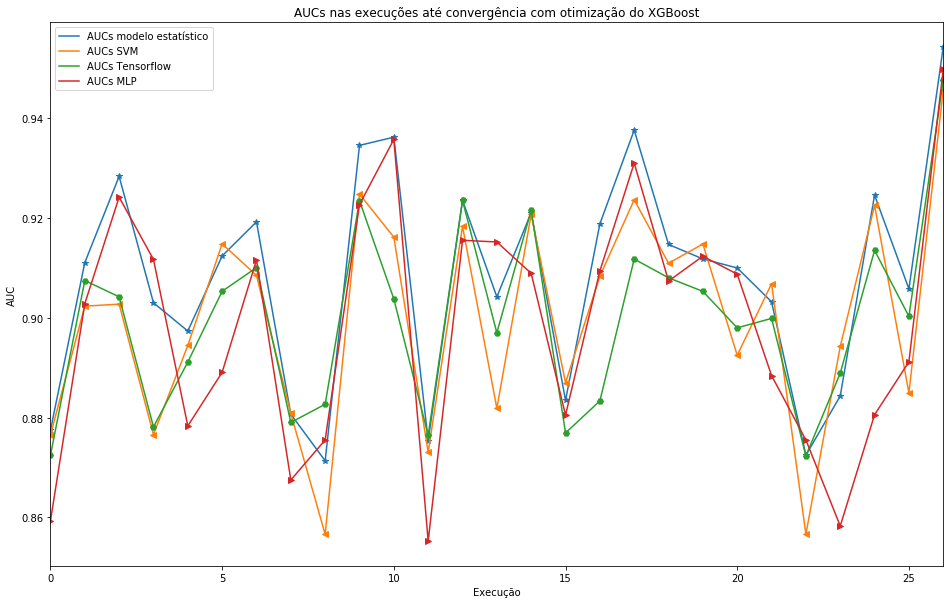

In [32]:
import matplotlib as mpl

# create valid markers from mpl.markers
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
df_media_desvpad_PSO_rand.rename(columns = {'aucs':'AUCs modelo estatístico', 'auc_svm':'AUCs SVM', 'auc_tensorflow' : 'AUCs Tensorflow', 'auc_mlp' : 'AUCs MLP'}, inplace = True) 

print(df_media_desvpad_PSO_rand['AUCs modelo estatístico'].std())
ax = df_media_desvpad_PSO_rand[['AUCs modelo estatístico', 'AUCs SVM', 'AUCs Tensorflow', 'AUCs MLP']].plot(figsize=(16,10))


# valid_markers = mpl.markers.MarkerStyle.filled_markers
markers = np.random.choice(valid_markers, df_media_desvpad_fa_rand.shape[1], replace=False)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

plt.title('AUCs nas execuções até convergência com PSO')
plt.rcParams.update({'font.size': 21})
plt.xlabel('Execução')
plt.ylabel('AUC')


plt.savefig('auc_pso_bigml_otimizacao_multiplicacao_tres_classificadores.png')
